In [1]:
import pickle
import pandas as pd
import numpy as np
# import functions
from functions import stem_tag_docs, preprocessor_and_stem, location_filter2, make_stop_words,\
                    get_recs_from_wordvec, EpochLogger, 
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec, Phrases
from gensim.parsing.preprocessing import STOPWORDS as stop_words
from gensim.utils import simple_preprocess
from sklearn.feature_extraction import text
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer

In [3]:
# this is each review cleaned for Doc2Vec. It is df_with_mins with only 'id' and 'text'
cleaned_reviews_df = pd.read_pickle('cleaned_reviews_df.pkl')

# load lookup dictoinary pickle file
file = open('lookup_dict.pickle', 'rb')
lookup_dict = pickle.load(file)
file.close

<function BufferedReader.close>

In [7]:
len(lookup_dict)

22514

In [6]:
# uses a customer function to create a list of stopwords
my_stop_words = make_stop_words()

In [8]:
# initiate a lancaster stemmer, and stem beer reviews while tagging them for Doc2Vec
ls = LancasterStemmer()
tagged_stem_docs = stem_tag_docs(cleaned_reviews_df, my_stop_words)


In [26]:
# process reviews, turn into list of TaggedDocument objects, with beer id as tag
tagged_docs = tag_docs(cleaned_reviews_df)

In [28]:
## Use format like this 

model = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=100, workers=8)

model.build_vocab(tagged_docs, progress_per = 100)

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [30]:
epoch_logger = EpochLogger()
model.train(tagged_docs, total_examples=model.corpus_count, epochs=1, callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end


In [118]:
vec = model['sour']
d2v_test = model.docvecs.most_similar([vec], topn=5000)
location_filter(d2v_test, 'WA', 'Seattle', 6)

{36949: ('Holy Mountain Brewing Company', '188999', 'The Hart'),
 28192: ('Urban Family Brewing Co.', '249057', 'Delicious Ambiguity'),
 20680: ('Fremont Brewing Company', '85085', 'The Lamb'),
 700: ('Elysian Brewing Company', '2027', 'Saison Elysee'),
 29693: ("Reuben's Brews", '187302', 'Gose'),
 17005: ('Two Beers Brewing Co.', '55833', 'Sodo Brown')}

In [125]:
model.save('epoch1-vs100')

In [298]:
model.docvecs.most_similar('188999')

[('143447', 0.833624005317688),
 ('133139', 0.833471417427063),
 ('176754', 0.8334231972694397),
 ('179873', 0.8323819637298584),
 ('115684', 0.8282082676887512),
 ('290204', 0.8205189108848572),
 ('155303', 0.8184943199157715),
 ('94154', 0.815578818321228),
 ('131532', 0.8148672580718994),
 ('155426', 0.8113924860954285)]

# STEMMED MODEL

In [215]:
# cleaned_text = cleaned_reviews_df[:50]
ls = LancasterStemmer()
tagged_stem_docs = stem_tag_docs(cleaned_reviews_df)

## Use format like this 

stem_model = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=100, workers=8)

stem_model.build_vocab(tagged_stem_docs)
epoch_logger = EpochLogger()
stem_model.train(tagged_stem_docs, total_examples=stem_model.corpus_count, epochs=5, callbacks=[epoch_logger])

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


In [253]:
get_recs_from_wordvec(stem_model, 'night', 5000, 'WA', 'Seattle', 4, stem = True)

{20680: ('Fremont Brewing Company', '317221', 'Stone Squirrel'),
 19764: ('Schooner Exact Brewing Company', '56171', 'King Street Brown Ale'),
 17005: ('Two Beers Brewing Co.', '113530', 'Fall Line (Alta Series)'),
 4378: ('Georgetown Brewing Company', '39024', 'Georgetown Porter')}

In [216]:
# increasing window size

stem_model_window = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=7, size=100, workers=8)

stem_model_window.build_vocab(tagged_stem_docs)
epoch_logger = EpochLogger()
stem_model_window.train(tagged_stem_docs, total_examples=stem_model_window.corpus_count, epochs=5, callbacks=[epoch_logger])

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


In [220]:
stem_model_window.save('stem_model_window7')

### Stemmed with vector size of 200

In [217]:
stem_model2 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=200, workers=8)

stem_model2.build_vocab(tagged_stem_docs)
epoch_logger = EpochLogger()
stem_model2.train(tagged_stem_docs, total_examples=stem_model2.corpus_count, epochs=5, callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


In [221]:
stem_model2.save('stem_model_vs200')

### Non-stemmed model

In [218]:
model = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=200, workers=8)

model.build_vocab(tagged_docs, progress_per = 100)
epoch_logger = EpochLogger()
model.train(tagged_docs, total_examples=model.corpus_count, epochs=5, callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


In [222]:
model.save('non-stem-vs200')

### Plotting

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
def get_doc_tags_from_keyword(model, keyword, topn):
    vec = model[keyword]
    keywords_and_sim = model.docvecs.most_similar([vec], topn=topn)
    doc_tags = []
    for i in keywords_and_sim:
        doc_tags.append(i[0])
    return doc_tags

def tsne_df(model, doc_tags):
    tsne = TSNE(n_components=2)
    vectors = model[doc_tags]
    vec_tsne = tsne.fit_transform(vectors)
    df = pd.DataFrame(vec_tsne, index=doc_tags, columns=['x', 'y'])
    return df

In [6]:
beers = pd.read_csv('beers-breweries-and-beer-reviews/beers.csv')
beers = beers.drop(206943 ,axis=0)
beers['style'].unique()

array(['English Oatmeal Stout', 'Russian Imperial Stout', 'Scottish Ale',
       'American Imperial Stout', 'American Cream Ale',
       'Japanese Rice Lager', 'American Lager', 'American IPA',
       'German Bock', 'English Stout', 'English Bitter',
       'Belgian Witbier', 'American Strong Ale',
       'American Pale Wheat Ale', 'Berliner Weisse',
       'American Pale Ale (APA)', 'British Barleywine',
       'American Black Ale', 'Baltic Porter', 'American Adjunct Lager',
       'European Pale Lager', 'American Porter', 'Fruit and Field Beer',
       'American Imperial IPA', 'American Wild Ale', 'Irish Red Ale',
       'English Pale Ale', 'American Amber / Red Lager', 'Belgian Saison',
       'Belgian IPA', 'Rye Beer', 'Belgian Quadrupel (Quad)',
       'German Hefeweizen', 'American Stout', 'Smoke Beer',
       'Belgian Tripel', 'American Amber / Red Ale', 'Pumpkin Beer',
       'German Maibock', 'German Dunkelweizen', 'Belgian Dark Ale',
       'Vienna Lager', 'English Extra Spec

In [108]:

beers['style'] = beers['style'].apply(lambda x: 'IPA' if 'IPA' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Stout' if 'Stout' in x else x)
# beers['style'] = beers['style'].apply(lambda x: 'Belgian' if 'Belgian' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Lager' if 'Lager' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Porter' if 'Porter' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Lager' if 'Lager' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'German' if 'German' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Pale' if 'Pale' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Barleywine' if 'Barleywine' in x else x)

In [121]:
beers['style'] = beers['style'].apply(lambda x: 'Barleywine' if 'Wheatwine' in x else x)
beers['style'] = beers['style'].apply(lambda x: 'Sour' if 'Oud Bruin' in x else x)
# beers['style'] = beers['style'].apply(lambda x: 'Sour' if 'Flanders' in x else x)


In [7]:
beers['id'] = beers['id'].astype(str)

In [8]:
model = Doc2Vec.load('ls-s300-20epoch.model')

In [9]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]

In [46]:

tsne = TSNE(n_components=2,)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

In [89]:
# having trouble getting this to work
def beer_style_doc_ids(styles: list):
    docs = []
    for style in styles:
        style_sub = beers.loc[beers['style'] == style]
        docs.extend(style_sub['id'])
    return docs

In [ ]:
plt.scatter(stout_df['x'], stout_df['y'])

In [47]:
# make subset from tsne_df of a specific beer style, for plotting
def make_tsne_subset(tsne_df, style):
    subset = beers.loc[beers['style'] == style]
    subset_set = set(subset['id'])
#     print(subset_set)
    match = set(tsne_df.index).intersection(subset_set)
#     print(match)
    style_subset = tsne_df[tsne_df.index.isin(match)]
    return style_subset

In [208]:
dark_styles = ['Stout', 'Porter', 'Barleywine', 'Belgian Quadrupel (Quad)', \
               'Belgian Strong Dark Ale', 'Pumpkin Beer', \
               'Scotch Ale / Wee Heavy']

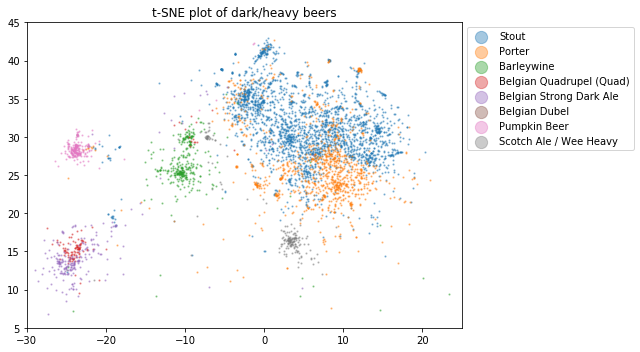

In [207]:
fig = plt.figure(figsize=(9,5))
ax = plt.subplot(111)
ax.set_ylim(bottom=5, top=45)
ax.set_xlim(left=-30, right=25)
for style in dark_styles:
    style_subset = make_tsne_subset(df, style)
    plt.scatter(style_subset['x'],style_subset['y'], s=1.5, alpha=0.4)
ax.legend(dark_styles,\
          bbox_to_anchor =(1,1), markerscale=10)
plt.title('t-SNE plot of dark/heavy beers')
plt.tight_layout()
plt.savefig('dark_beers.png', dpi=200)

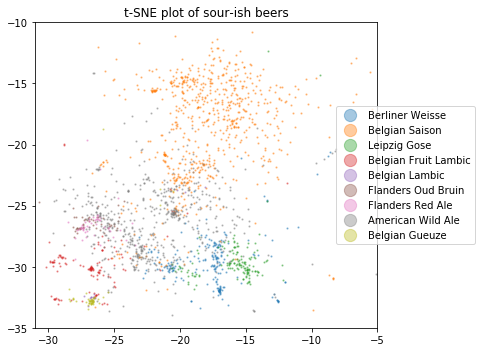

In [210]:
sour_styles = ['Berliner Weisse', 'Belgian Saison', 'Leipzig Gose',\
              'Belgian Fruit Lambic', 'Belgian Lambic', 'Flanders Oud Bruin',\
              'Flanders Red Ale','American Wild Ale', 'Belgian Gueuze']
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.set_ylim(bottom=-35, top=-10)
ax.set_xlim(left=-31, right=-5)
for style in sour_styles:
    style_subset = make_tsne_subset(df, style)
    plt.scatter(style_subset['x'],style_subset['y'], s=1.5, alpha=0.4)
ax.legend(sour_styles,\
          loc=5,bbox_to_anchor =(1.3,0.5), markerscale=10)
plt.title('t-SNE plot of sour-ish beers')
plt.tight_layout()
plt.savefig('sour_beers.png', dpi=200)

In [145]:
beers['style'].unique()

array(['Stout', 'Scottish Ale', 'American Cream Ale', 'Lager', 'IPA',
       'German', 'English Bitter', 'Belgian Witbier',
       'American Strong Ale', 'Pale', 'Berliner Weisse', 'Barleywine',
       'American Black Ale', 'Porter', 'Fruit and Field Beer',
       'American Wild Ale', 'Irish Red Ale', 'Belgian Saison', 'Rye Beer',
       'Belgian Quadrupel (Quad)', 'Smoke Beer', 'Belgian Tripel',
       'American Amber / Red Ale', 'Pumpkin Beer', 'Belgian Dark Ale',
       'English Extra Special / Strong Bitter (ESB)',
       'Scotch Ale / Wee Heavy', 'Leipzig Gose', 'American Brown Ale',
       'American Blonde Ale', 'Bohemian Pilsener',
       'European Export / Dortmunder', 'French Bière de Garde',
       'California Common / Steam Beer', 'Winter Warmer',
       'American Imperial Red Ale', 'Belgian Dubbel', 'Belgian Gueuze',
       'English Brown Ale', 'Belgian Strong Dark Ale',
       'Herb and Spice Beer', 'English Old Ale', 'Chile Beer',
       'American Brett', 'Belgian Fruit L

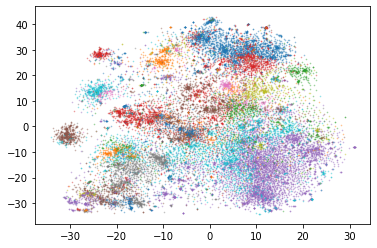

In [135]:
fig = plt.figure()
ax = plt.subplot(111)
for style in beers['style'].unique():
    style_subset = make_tsne_subset(df, style)
    plt.scatter(style_subset['x'],style_subset['y'], s=0.4, alpha=0.4)
# ax.legend(beers['style'].unique(),\
#           bbox_to_anchor =(1,1), markerscale=10)
# ax.set_xlim(left=-5, right=25)
# ax.set_ylim(bottom=15, top=45)

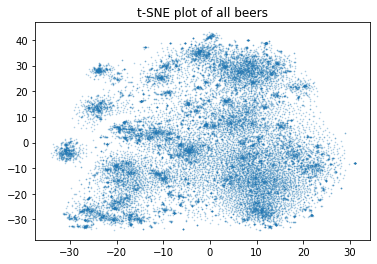

In [209]:
plt.scatter(df['x'], df['y'], s=0.4, alpha=0.3)
plt.title('t-SNE plot of all beers')
# plt.savefig('all_beers.png', dpi=200)

In [83]:
stout = make_tsne_subset(df, 'Stout');

In [82]:
belgian = make_tsne_subset(df, 'Belgian');

In [85]:
porter = make_tsne_subset(df, 'Porter')

In [86]:
pale = make_tsne_subset(df, 'Pale')

In [90]:
lager = make_tsne_subset(df, 'Lager')

In [93]:
wild = make_tsne_subset(df, 'American Wild Ale')

In [122]:
sour = make_tsne_subset(df, 'Sour')

In [24]:
IPAs = beers.loc[beers['style'] == 'IPA']

In [123]:
barleywine = make_tsne_subset(df, 'Barleywine')
winter = make_tsne_subset(df, 'Winter Warmer')

In [34]:
IPAs['id'] = IPAs['id'].astype(str)

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
IPA = set(IPAs['id'])

In [48]:
test = set(df.index).intersection(IPA)

In [52]:
IPA_sub = df[df.index.isin(test)]

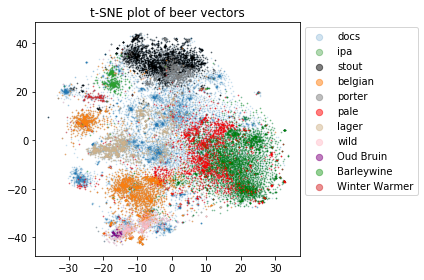

In [146]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(df['x'], df['y'], s=0.4, alpha=0.2)
plt.scatter(IPA_sub['x'], IPA_sub['y'], s=0.4, alpha=0.3, c='green')
plt.scatter(stout['x'], stout['y'], s=0.4, alpha=0.5, c='black')
plt.scatter(belgian['x'], belgian['y'], s=0.4, alpha=0.5)
plt.scatter(porter['x'], porter['y'], s=0.4, alpha=0.5, c='gray')
plt.scatter(pale['x'], pale['y'], s=0.4, alpha=0.5, c='red')
plt.scatter(lager['x'], lager['y'], s=0.4, alpha=0.5, c='tan')
plt.scatter(wild['x'], wild['y'], s=0.4, alpha=0.5, c='pink')
plt.scatter(sour['x'], sour['y'], s=0.4, alpha=0.5, c='purple')
plt.scatter(barleywine['x'], barleywine['y'], s=0.4, alpha=0.5)
plt.scatter(winter['x'], winter['y'], s=0.4, alpha=0.5)
# plt.legend(['docs','ipa', 'stout', 'belgian', 'porter', 'pale', 'lager', 'wild'])
ax.legend(['docs','ipa', 'stout', 'belgian', 'porter', 'pale', 'lager', 'wild', 'Oud Bruin', 'Barleywine', 'Winter Warmer'],\
          bbox_to_anchor =(1,1), markerscale=10)
plt.title('t-SNE plot of beer vectors')
plt.tight_layout()
plt.savefig('beerplot.png', dpi=200)


In [55]:
model.docvecs.vectors

array([], shape=(0, 300), dtype=float64)

In [ ]:
sour_tags = get_doc_tags_from_keyword('sour', 100)  
sour_df = tsne_df(sour_tags)

In [ ]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

In [195]:
sour_tags = get_doc_tags_from_keyword('sour', 5000)  
sour_df = tsne_df(sour_tags)

In [193]:
hop_tags = get_doc_tags_from_keyword('hop', 5000)  
hop_df = tsne_df(hop_tags)

In [194]:
dank_tags = get_doc_tags_from_keyword('dank', 5000)  
dank_df = tsne_df(dank_tags)

In [188]:
stout_tags = get_doc_tags_from_keyword('stout', 5000)  
stout_df = tsne_df(stout_tags)

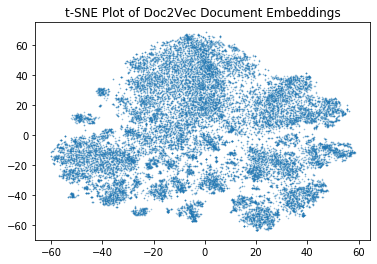

<Figure size 432x288 with 0 Axes>

In [212]:
fig = plt.plot()
plt.scatter(df['x'], df['y'],s=0.4, alpha = 0.4)
# plt.scatter(sour_df['x'], sour_df['y'], c='red', s=0.4, alpha=0.5)
# plt.scatter(hop_df['x'], hop_df['y'], c='green', s=1, alpha=0.5)
# plt.scatter(dank_df['x'], dank_df['y'], c='yellow', s=1, alpha=0.5)
# plt.scatter(stout_df['x'], stout_df['y'], c='black', s=1, alpha=0.5)
plt.title('t-SNE Plot of Doc2Vec Document Embeddings')
plt.show()
plt.savefig('t-SNE of all docs', quality=90)

# Testing Models from Thursday Night

In [269]:
# test_multiple_models(models,'night', 5000, 'WA', 'Seattle', 4);

In [292]:
get_recs_from_wordvec(stem_model, 'motor', 5000, 'WA', 'Seattle', 4, stem = True)

{403: ('Pyramid Breweries, Inc.', '55540', 'Fling Pale Ale'),
 363: ('Big Time Brewery & Alehouse', '946', 'Prime Time Pale Ale'),
 17005: ('Two Beers Brewing Co.', '197366', 'Wonderland Trail IPA'),
 28192: ('Urban Family Brewing Co.', '144130', 'Hoppy Magnolia')}

In [302]:
get_recs_from_wordvec(stem_model_window, 'citra', 5000, 'WA', 'Seattle', 4, stem = True)

{403: ('Pyramid Breweries, Inc.', '55540', 'Fling Pale Ale'),
 4378: ('Georgetown Brewing Company', '320005', 'Citrus Galaxy'),
 363: ('Big Time Brewery & Alehouse', '946', 'Prime Time Pale Ale'),
 28192: ('Urban Family Brewing Co.', '144130', 'Hoppy Magnolia')}

In [351]:
get_recs_from_wordvec(stem_model2, 'hoppy', 5000, 'WA', 'Seattle', 4, stem = True)

{403: ('Pyramid Breweries, Inc.', '1238', 'Pale Ale'),
 700: ('Elysian Brewing Company', '87540', "Men's Room Black Imperial Ale"),
 17005: ('Two Beers Brewing Co.', '197366', 'Wonderland Trail IPA'),
 363: ('Big Time Brewery & Alehouse', '946', 'Prime Time Pale Ale')}

In [352]:
get_recs_from_wordvec(model, 'dank', 5000, 'WA', 'Seattle', 4, stem = False)

{20680: ('Fremont Brewing Company', '246332', 'Field To Ferment: Simcoe'),
 29693: ("Reuben's Brews", '321482', 'Bits & Bobs'),
 4378: ('Georgetown Brewing Company', '187285', 'Bodhizafa IPA'),
 17005: ('Two Beers Brewing Co.', '197366', 'Wonderland Trail IPA')}

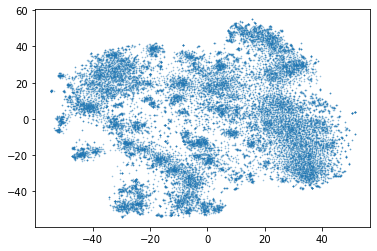

In [296]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
plt.scatter(df['x'], df['y'],s=0.4, alpha = 0.4)

In [310]:
stout_tags = get_doc_tags_from_keyword(model, 'stout', 5000)  
stout_df = tsne_df(model, stout_tags)

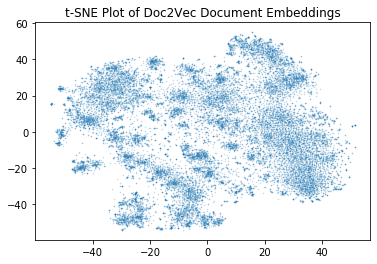

In [320]:
# plt.scatter(stout_df['x'], stout_df['y'], s=0.4, alpha=0.4)
plt.scatter(df['x'], df['y'],s=0.2, alpha = 0.3)
plt.title('t-SNE Plot of Doc2Vec Document Embeddings')
plt.show()

In [10]:
# Yellowbrick
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

In [11]:
corpus = load_hobbies()

In [13]:
corpus.labels

['gaming', 'cooking', 'cinema', 'books', 'sports']

### Monday February 3rd - Function to search by location, and word or specific beer

In [4]:
from gensim.models.callbacks import CallbackAny2Vec
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))

    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1
        
# this is the above but trying it to return a dict
def location_filter(ranked_beers, state, city, n):

    located_brewery = {}
    # state = 'CA'
    # city = 'Los Angeles'
    counter = 0

    for beer in ranked_beers:
        if counter < n:
            dict_state = lookup_dict[beer[0]]['state']
            dict_city = lookup_dict[beer[0]]['city']
            brewery_id = lookup_dict[beer[0]]['brewery_id']
            brewery_name = lookup_dict[beer[0]]['brewery_name']
            beer_name = lookup_dict[beer[0]]['name']
            if (dict_state == state) and (dict_city == city):
        #             print(beer_breweries_lookup[beer[0]])
#                 print(beer[0])
                if brewery_id in located_brewery:
                    continue
                else:  
                    located_brewery[brewery_id] = (brewery_name, beer[0], beer_name)
                counter += 1
    return located_brewery
model = Doc2Vec.load('stem_model_vs200')

In [11]:
model.similar_by_word('ristretto')

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('coffeb', 0.8569510579109192),
 ('charbuck', 0.8553096652030945),
 ('nestlé', 0.8441129922866821),
 ('machiato', 0.8373351097106934),
 ('valrhon', 0.8359583020210266),
 ('espressso', 0.8352636098861694),
 ('caffè', 0.8310182094573975),
 ('esprsso', 0.8310052752494812),
 ('dagob', 0.8305578231811523),
 ('frapuccino', 0.825951337814331)]

In [72]:
vector = model.infer_vector(['tastes', 'like', 'chocolate', 'and', 'thick', 'mouthfeel', 'but', 'hate', 'barrel'])

In [73]:
infer_test = model.docvecs.most_similar([vector], topn=1000)

In [50]:
def location_filter(ranked_beers, state, city, n):

    located_brewery = {}
    # state = 'CA'
    # city = 'Los Angeles'
    counter = 0

    for beer in ranked_beers:
        if counter < n:
            dict_state = lookup_dict[beer[0]]['state']
            dict_city = lookup_dict[beer[0]]['city']
            brewery_id = lookup_dict[beer[0]]['brewery_id']
            brewery_name = lookup_dict[beer[0]]['brewery_name']
            beer_name = lookup_dict[beer[0]]['name']
            if (dict_state == state) and (dict_city == city):
        #             print(beer_breweries_lookup[beer[0]])
#                 print(beer[0])
                if brewery_id in located_brewery:
                    continue
                else:  
                    located_brewery[brewery_id] = (brewery_name, beer[0], beer_name)
                counter += 1
    return located_brewery

def location_filter2(ranked_beers, lookup_dict, state, city, n):
    """ 
    This takes a list of tuples where the 1st element is a beer_id. It searches through the lookup dictionary
    to match breweries based upon their location. And returns n number of recommendations

    It returns the beer_id as key, and brewery_name, beer id, and beer name as values
    """
    located_brewery = {}
    # state = 'CA'
    # city = 'Los Angeles'
    counter = 0

    for beer in ranked_beers:
        if counter < n:
            dict_state = lookup_dict[beer[0]]['state']
            dict_city = lookup_dict[beer[0]]['city']
            brewery_id = lookup_dict[beer[0]]['brewery_id']
            brewery_name = lookup_dict[beer[0]]['brewery_name']
            beer_name = lookup_dict[beer[0]]['name']
            if (len(state) > 0) and (len(city)>0):
                if (dict_state == state) and (dict_city == city):
            #             print(beer_breweries_lookup[beer[0]])
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = (brewery_name, beer[0], beer_name)
                
                    counter += 1
            # ignores state field
            elif len(state) == 0:
                if (dict_city == city):        
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = (brewery_name, beer[0], beer_name)
                
                    counter += 1

            elif len(city) == 0:        
                if (dict_state == state):
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = (brewery_name, beer[0], beer_name)
                
                    counter += 1
                
    return located_brewery


In [39]:
lookup_dict['333380']

{'brewery_id': 41849,
 'name': 'Double Tapped',
 'city': 'Williamsburg',
 'state': 'VA',
 'country': 'US',
 'brewery_name': 'The Virginia Beer Company'}

In [74]:
location_filter(infer_test, 'WA', 'Seattle', 2)

{17005: ('Two Beers Brewing Co.', '113530', 'Fall Line (Alta Series)'),
 36949: ('Holy Mountain Brewing Company', '216398', 'Midnight Still')}

In [109]:
get_recs_from_wordvec(model, 'belgian', 10000, 'OR', 'Portland', 4, stem = True)

{2980: ('Alameda Brewhouse', '66125', 'My Bloody Valentine'),
 43: ('BridgePort Brewing Co. / Brewpub', '47846', 'Fallen Friar'),
 127: ('Portland Brewing Company', '89445', 'Portland Brewing Rose Hip Ale'),
 29003: ('Gigantic Brewing Company', '89926', 'The End Of Reason')}

In [12]:
def d2v_main_input(model):
    # this function serves as the entry function for the user, takes their location
    # information, and then asks them how they would like to explore the Doc2Vec model:
    # either with keyword search or a specific beer
    state = get_state()
    city = get_city() 
    while True:
        which_model = input ("Do you want to A) Find a brewery based upon a beer you love, or B) explore beers with keywords?")
        if which_model in ['A', 'B']:
            break
        print ('Please enter either A or B')
    if which_model == 'A':
        recs = beer2beer(state,city,model)
        return recs
    elif which_model == 'B':
        keyword = input ("Please enter a single descriptor word to find similar beers.")
        print(get_recs_from_wordvec(model, keyword, 8000, state, city, 3))
    
def d2v_main_input2(model):
    # this function serves as the entry function for the user, takes their location
    # information, and then asks them how they would like to explore the Doc2Vec model:
    # either with keyword search or a specific beer
    state = get_state2()
    city = get_city2() 
    while True:
        which_model = input ("Do you want to A) Find a brewery based upon a beer you love, or B) explore beers with keywords?")
        if which_model in ['A', 'B']:
            break
        print ('Please enter either A or B')
    if which_model == 'A':
        recs = beer2beer2(state,city,model)
        return recs
    elif which_model == 'B':
        keyword = input ("Please enter a single descriptor word to find similar beers.")
        print(get_recs_from_wordvec2(model, keyword, 8000, state, city, 3))
    

In [13]:
def get_recs_from_wordvec(model, keyword, topn, state, city, n_recs, stem=True):
    if stem == True:
        ls = LancasterStemmer()
        vec = model[ls.stem(keyword)]
        tags = model.docvecs.most_similar([vec], topn=topn)
#     else:
#         vec = model[keyword]
#         tags = model.docvecs.most_similar([vec], topn=topn)
    return location_filter(tags, state, city, n_recs)
def get_recs_from_wordvec2(model, keyword, topn, state, city, n_recs=3, stem=True):
    if stem == True:
        ls = LancasterStemmer()
        vec = model[ls.stem(keyword)]
        tags = model.docvecs.most_similar([vec], topn=topn)
#     else:
#         vec = model[keyword]
#         tags = model.docvecs.most_similar([vec], topn=topn)
    return location_filter2(tags, lookup_dict, state, city, 3)

In [14]:
def get_state():
    while True:
        state = input ("Which state? (Please use 2 letter format, e.g. Washington = WA)")
        if len(state) == 2:
            break
    return state.upper()

def get_city():
    city = input ("Which city?")
    return city.title()

def get_state2():
    state = input ("Which state? (Please use 2 letter format, e.g. Washington = WA)")
    return state.upper()

def get_city2():
    city = input ("Which city?")
    return city.title()

In [15]:
def beer2beer(state, city, model):
    beer = input ("Please enter the name of a beer:")
    for i in lookup_dict:
        if lookup_dict[i]['name'] == beer:
            recs = model.docvecs.most_similar(str(i), topn=8000)
            return location_filter(recs, state, city, 3)
    print ('Looks like we coulnd\'t find that one')
    
def beer2beer2(state, city, model):
    beer = input ("Please enter the name of a beer:")
    for i in lookup_dict:
        if lookup_dict[i]['name'] == beer:
            recs = model.docvecs.most_similar(str(i), topn=8000)
            return location_filter2(recs, state, city, 3)
    print ('Looks like we coulnd\'t find that one')
    

In [16]:
d2v_main_input2(stem_model3)

NameError: name 'stem_model3' is not defined

In [252]:
import pickle

In [254]:
pickle.dump(lookup_dict, open('lookup_dict.pickle', "wb"))

## More training

In [16]:
def snow_tag_docs(docs):
    sn = SnowballStemmer(language='english')
    results = docs.apply(lambda r: TaggedDocument(words=preprocessor_and_snow(r['text']), tags=[str(r['id'])]), axis=1)
    return results.tolist()

def preprocessor_and_snow(text):
    # uses gensim simple_preprocess and then removes stop words
    simple = simple_preprocess(text)
    result = [sn.stem(word) for word in simple if not word in my_stop_words]
#     print('stemmed')
    return result

In [9]:
ls = LancasterStemmer()
tagged_stem_docs = stem_tag_docs(cleaned_reviews_df)

In [10]:
stem_model1 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

stem_model1.build_vocab(tagged_stem_docs)
stem_model1.train(tagged_stem_docs, total_examples=stem_model1.corpus_count, epochs=5)
stem_model1.save('ls-s300-5epoch')

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [11]:
stem_model2 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

stem_model2.build_vocab(tagged_stem_docs)
stem_model2.train(tagged_stem_docs, total_examples=stem_model2.corpus_count, epochs=10)
stem_model2.save('ls-s300-10epoch')

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [12]:
stem_model3 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

stem_model3.build_vocab(tagged_stem_docs)
stem_model3.train(tagged_stem_docs, total_examples=stem_model3.corpus_count, epochs=20)
stem_model3.save('ls-s300-20epoch')

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [72]:
stem_model3.save('ls-s300-20epoch.model')

In [76]:
test_model = Doc2Vec.load('ls-s300-20epoch.model')

In [17]:
sn = SnowballStemmer(language = 'english')
tagged_snow_docs = snow_tag_docs(cleaned_reviews_df)

KeyboardInterrupt: 

In [ ]:
snow_model1 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

snow_model1.build_vocab(tagged_snow_docs)
snow_model1.train(tagged_stem_docs, total_examples=snow_model1.corpus_count, epochs=5)
snow_model1.save('sn-s300-5epoch')

In [ ]:
snow_model2 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

snow_model2.build_vocab(tagged_snow_docs)
snow_model2.train(tagged_stem_docs, total_examples=snow_model2.corpus_count, epochs=10)
snow_model2.save('sn-s300-10epoch')

In [ ]:
snow_model3 = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

snow_model3.build_vocab(tagged_snow_docs)
snow_model3.train(tagged_stem_docs, total_examples=snow_model3.corpus_count, epochs=20)
snow_model3.save('sn-s300-20epoch')

### Testing LS models

In [5]:
stem_model3 = Doc2Vec.load('ls-s300-20epoch.model')

In [6]:
import pickle
lookup_file = open("lookup_dict.pickle", "rb")
lookup_dict = pickle.load(lookup_file)
lookup_file.close()

In [14]:
d2v_main_input(stem_model3)

Which state? (Please use 2 letter format, e.g. Washington = WA)WA
Which city?Seattle
Do you want to A) Find a brewery based upon a beer you love, or B) explore beers with keywords?B
Please enter a single descriptor word to find similar beers.dank
{20680: ('Fremont Brewing Company', '246333', 'Field To Ferment: Citra'), 700: ('Elysian Brewing Company', '84045', 'Space Dust IPA'), 29693: ("Reuben's Brews", '88313', 'Imperial IPA')}


In [13]:
stem_model3.wv.similar_by_word('strange')

[('od', 0.8685327172279358),
 ('weird', 0.8601917028427124),
 ('sort', 0.6973389387130737),
 ('unus', 0.6912434101104736),
 ('wierd', 0.670067310333252),
 ('strangely', 0.6650276184082031),
 ('bizar', 0.6641640067100525),
 ('kind', 0.6511018872261047),
 ('unpleas', 0.6257859468460083),
 ('interest', 0.6245748400688171)]

In [67]:
stem_model3.wv.most_similar(positive=['simco'], negative=['light'])

[('amarillo', 0.4987469017505646),
 ('mosa', 0.4707816243171692),
 ('centen', 0.46869051456451416),
 ('chinook', 0.45866456627845764),
 ('ahtan', 0.4266662895679474),
 ('ctz', 0.40609705448150635),
 ('tomohawk', 0.4050108790397644),
 ('galaxy', 0.39833375811576843),
 ('azacc', 0.39584800601005554),
 ('riwak', 0.39029550552368164)]

In [77]:
test_model.wv.most_similar('simco')

[('amarillo', 0.7935137748718262),
 ('centen', 0.7512073516845703),
 ('chinook', 0.7216653823852539),
 ('mosa', 0.6857686042785645),
 ('tomohawk', 0.6045267581939697),
 ('ctz', 0.5955313444137573),
 ('moutek', 0.5927008986473083),
 ('amarill', 0.5864415168762207),
 ('galaxy', 0.5812259316444397),
 ('ahtan', 0.5794715881347656)]

In [88]:
vec = stem_model3[ls.stem('simcoe')]
tags = stem_model3.docvecs.mobst_similar([vec], topn=5)

In [12]:
stem_model3.corpus_total_words

112626062

In [46]:
stem_model3.docvecs.most_similar(str(3755), topn=8000)

[('112900', 0.5394092798233032),
 ('95615', 0.5370054841041565),
 ('50604', 0.5313206911087036),
 ('224587', 0.5302579998970032),
 ('258918', 0.529947817325592),
 ('61059', 0.5253394842147827),
 ('15570', 0.5215867161750793),
 ('295970', 0.5136249661445618),
 ('171408', 0.5135406851768494),
 ('339140', 0.5117677450180054),
 ('33612', 0.5084927082061768),
 ('21239', 0.508286714553833),
 ('49249', 0.5068066716194153),
 ('189607', 0.5067238807678223),
 ('63800', 0.5042872428894043),
 ('248436', 0.5029608011245728),
 ('266793', 0.5026556253433228),
 ('110701', 0.500055730342865),
 ('255457', 0.4986472725868225),
 ('160873', 0.4985547959804535),
 ('251762', 0.49589449167251587),
 ('86795', 0.49501341581344604),
 ('63515', 0.49475955963134766),
 ('98804', 0.49349522590637207),
 ('22287', 0.4916914105415344),
 ('94841', 0.4915449917316437),
 ('43773', 0.4889538288116455),
 ('9875', 0.48831042647361755),
 ('90058', 0.48785585165023804),
 ('223823', 0.4869188368320465),
 ('234908', 0.4864821434

In [48]:
docvec = stem_model3.docvecs['95615']  # assuming such a doc-tag exists
similar_words = stem_model3.most_similar(positive=[docvec])
print(similar_words)

[('schaumburger', 0.6564119458198547), ('saatz', 0.6312193274497986), ('hazzl', 0.6276844143867493), ('sazzy', 0.6023728847503662), ('flavors', 0.5953867435455322), ('pilseneresqu', 0.5922929048538208), ('perfecrt', 0.5903142690658569), ('pilsenery', 0.58619225025177), ('waq', 0.5846034288406372), ('chechv', 0.5809545516967773)]


//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from nltk.cluster import KMeansClusterer
import nltk

text = 'all your base are belong to us all of your base base base'

# def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
#     wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
#                           relative_scaling = 1.0,
#                           stopwords = {'to', 'of'} # set or space-separated string
#                           ).generate(text)
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

# generate_wordcloud(stem_model3.wv.vocab.items())

In [40]:
X = stem_model3.wv.vocab.keys()

In [19]:
location_filter(stem_model3.docvecs.most_similar(str(95615),'Seattle', 'WA', 4))

TypeError: '<' not supported between instances of 'str' and 'int'

In [11]:
mega_model = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, size=300, workers=8)

mega_model.build_vocab(tagged_stem_docs)
mega_model.train(tagged_stem_docs, total_examples=mega_model.corpus_count, epochs=100)
mega_model.save('mega-model-100epoch')

In [ ]:
d2v_main_input2(mega_model)